In [1]:
%load_ext autoreload
%autoreload 2
# %matplotlib widget

from scipy.io import loadmat
import numpy as np
import neurospyke as ns

In [3]:
spike_trains = loadmat('./output/ET1/R21-15/R21-15.mat')
spike_trains = spike_trains['spike_trains']

print(spike_trains)

[[[[[0. 0. 0. ... 0. 0. 0.]
    [0. 0. 0. ... 0. 0. 0.]
    [0. 0. 0. ... 0. 0. 0.]
    ...
    [0. 0. 0. ... 0. 0. 0.]
    [0. 0. 0. ... 0. 0. 0.]
    [0. 0. 0. ... 0. 0. 0.]]

   [[0. 0. 0. ... 0. 0. 0.]
    [0. 0. 0. ... 0. 0. 0.]
    [0. 0. 0. ... 0. 0. 0.]
    ...
    [0. 0. 0. ... 0. 0. 0.]
    [0. 0. 0. ... 0. 0. 0.]
    [0. 0. 0. ... 0. 0. 0.]]

   [[0. 0. 0. ... 0. 0. 0.]
    [0. 0. 0. ... 0. 0. 0.]
    [0. 0. 0. ... 0. 0. 0.]
    ...
    [0. 0. 0. ... 0. 0. 0.]
    [0. 0. 0. ... 0. 0. 0.]
    [0. 0. 0. ... 0. 0. 0.]]

   ...

   [[0. 0. 0. ... 0. 0. 0.]
    [0. 0. 0. ... 0. 0. 0.]
    [0. 0. 0. ... 0. 0. 0.]
    ...
    [0. 0. 0. ... 0. 0. 0.]
    [0. 0. 0. ... 0. 0. 0.]
    [0. 0. 0. ... 0. 0. 0.]]

   [[0. 0. 0. ... 0. 0. 0.]
    [0. 0. 0. ... 0. 0. 0.]
    [0. 0. 0. ... 0. 0. 0.]
    ...
    [0. 0. 0. ... 0. 0. 0.]
    [0. 0. 0. ... 0. 0. 0.]
    [0. 0. 0. ... 0. 0. 0.]]

   [[0. 0. 0. ... 0. 0. 0.]
    [0. 0. 0. ... 0. 0. 0.]
    [0. 0. 0. ... 0. 0. 0.]
    ...
    [0. 0.

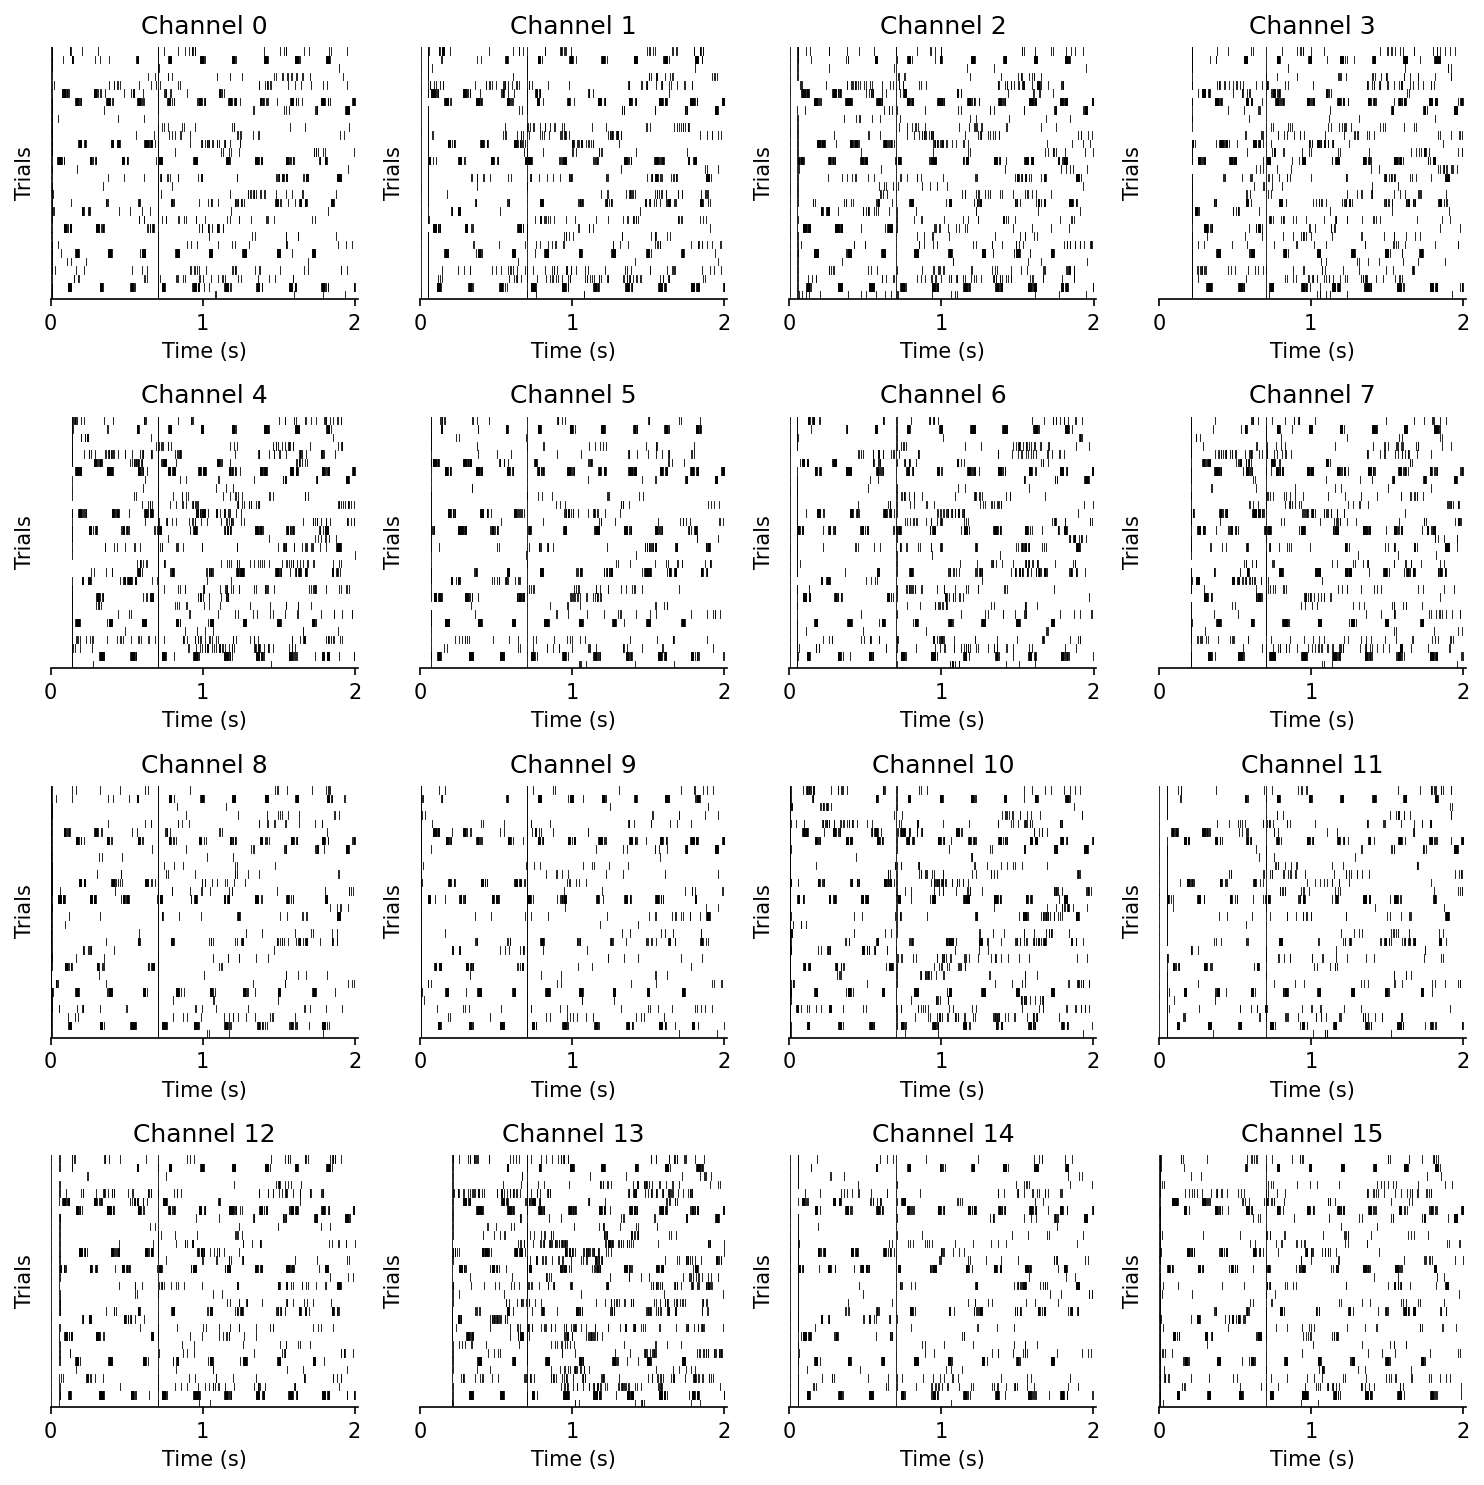

In [27]:
sampling_frequency = 25000
sampling_time = 1 / sampling_frequency

trial_duration = 2
trial_samples = np.floor(trial_duration * sampling_frequency).astype(np.int_)

import matplotlib.pyplot as plt
fig, axs = plt.subplots(4, 4, figsize=(10, 10), dpi=150)

for channel in np.arange(0, 16):
    spike_train_trials = spike_trains[0, 0, channel, :, 0:trial_samples]
    spikes_idxs = []
    for idx in np.arange(np.size(spike_train_trials, 0)):
        spikes_idxs.append(ns.utils.convert_spike_train_to_spikes_idxs(spike_train_trials[idx]))

    ns.visualization.plot_spike_train(spikes_idxs, sampling_time=1/25000, ax=axs[int(np.floor(channel / 4)), (channel % 4)], title='Channel ' + str(channel), channel_labels=None, ylabel='Trials', reverse=True, vertical_spacing=0.1, linewidth=0.4)

plt.tight_layout()